<a href="https://colab.research.google.com/github/MassiveTortoise/Colab/blob/main/Hypothesis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis 2:

---

### Research Question 2: Does followers affect artist's popularity in the top 100?

H₀: The number of followers does not significantly affect the artist's popularity

H₁: The number of followers has a significant impact on the artist's popularity



In [ ]:
import requests
import json
import pandas as pd
import base64

In [ ]:
def get_access_token():
    client_id = "4b180c9573244a5892f11df40ecad4d6"
    client_secret = "03d2128bf1b74dd29ac62f488aa5ead8"

    url = "https://accounts.spotify.com/api/token"
    headers = {
        "Authorization": "Basic " + base64.b64encode(f"{client_id}:{client_secret}".encode()).decode(),
        "Content-Type": "application/x-www-form-urlencoded"
    }
    data = {
        "grant_type": "client_credentials"
    }

    response = requests.post(url, headers=headers, data=data)
    return response.json().get("access_token")


In [ ]:
access_token = get_access_token()

# Print the access token to see it
print("Access Token:", access_token)

Access Token: BQBnIPAJW3zwu-jofLN49A9iuSgKDI4-6JGyj5wD4BCpb5GrIeLXMiPZ-2Fv0A47y5ddEEbGfyUeJCeely05Aezbx4sIW7UnJKllFlNayy1QjHqRra0


In [ ]:
def search_all_artists(limit=50):
    token = get_access_token()
    if not token:
        return []

    all_artists = []
    for letter in range(65, 91):  # Loop through A-Z
        offset = 0
        while True:
            url = f"https://api.spotify.com/v1/search?q={chr(letter)}&type=artist&limit={limit}&offset={offset}"
            response = requests.get(url, headers={"Authorization": f"Bearer {token}"})
            if not response.ok:
                break

            artists = response.json().get("artists", {}).get("items", [])
            if not artists:
                break
            all_artists.extend(artists)
            offset += limit

    return all_artists


In [ ]:
artist_data = search_all_artists()

artist_df = pd.DataFrame(artist_data)


artist_df

,external_urls,followers,genres,href,id,images,name,popularity,type,uri
0,{'spotify': 'https://open.spotify.com/artist/6...,"{'href': None, 'total': 3460480}",[pov: indie],https://api.spotify.com/v1/artists/6s22t5Y3prQ...,6s22t5Y3prQHyaHWUN1R1C,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",AJR,73,artist,spotify:artist:6s22t5Y3prQHyaHWUN1R1C
1,{'spotify': 'https://open.spotify.com/artist/6...,"{'href': None, 'total': 100291604}",[pop],https://api.spotify.com/v1/artists/66CXWjxzNUs...,66CXWjxzNUsdJxJ2JdwvnR,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Ariana Grande,92,artist,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR
2,{'spotify': 'https://open.spotify.com/artist/0...,"{'href': None, 'total': 4548436}","[contemporary r&b, dance pop, hip pop, r&b, ur...",https://api.spotify.com/v1/artists/0urTpYCsixq...,0urTpYCsixqZwgNTkPJOJ4,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Aaliyah,69,artist,spotify:artist:0urTpYCsixqZwgNTkPJOJ4
3,{'spotify': 'https://open.spotify.com/artist/1...,"{'href': None, 'total': 15065573}","[east coast hip hop, hip hop, rap]",https://api.spotify.com/v1/artists/13ubrt8QOOC...,13ubrt8QOOCPljQ2FL1Kca,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",A$AP Rocky,86,artist,spotify:artist:13ubrt8QOOCPljQ2FL1Kca
4,{'spotify': 'https://open.spotify.com/artist/7...,"{'href': None, 'total': 29544827}","[australian rock, hard rock, rock]",https://api.spotify.com/v1/artists/711MCceyCBc...,711MCceyCBcFnzjGY4Q7Un,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",AC/DC,84,artist,spotify:artist:711MCceyCBcFnzjGY4Q7Un
...,...,...,...,...,...,...,...,...,...,...
25995,{'spotify': 'https://open.spotify.com/artist/1...,"{'href': None, 'total': 10241}",[],https://api.spotify.com/v1/artists/1kqmfPNXoed...,1kqmfPNXoed2ueFvyMfNP7,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Z Berg,34,artist,spotify:artist:1kqmfPNXoed2ueFvyMfNP7
25996,{'spotify': 'https://open.spotify.com/artist/1...,"{'href': None, 'total': 31167}","[chinese singer-songwriter, mainland chinese pop]",https://api.spotify.com/v1/artists/1p8mNyT18G4...,1p8mNyT18G4coJooY8NTGN,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",金志文,39,artist,spotify:artist:1p8mNyT18G4coJooY8NTGN
25997,{'spotify': 'https://open.spotify.com/artist/1...,"{'href': None, 'total': 270}",[calming instrumental],https://api.spotify.com/v1/artists/1rXR5cwxxip...,1rXR5cwxxippMLTtaeAa6y,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Leo Zimmerman,50,artist,spotify:artist:1rXR5cwxxippMLTtaeAa6y
25998,{'spotify': 'https://open.spotify.com/artist/7...,"{'href': None, 'total': 1437}",[],https://api.spotify.com/v1/artists/7DHVVPqZYKC...,7DHVVPqZYKCrro216FSMzq,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Zarech,31,artist,spotify:artist:7DHVVPqZYKCrro216FSMzq


In [ ]:
df = artist_df.copy()
df


,external_urls,followers,genres,href,id,images,name,popularity,type,uri
0,{'spotify': 'https://open.spotify.com/artist/6...,"{'href': None, 'total': 3460480}",[pov: indie],https://api.spotify.com/v1/artists/6s22t5Y3prQ...,6s22t5Y3prQHyaHWUN1R1C,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",AJR,73,artist,spotify:artist:6s22t5Y3prQHyaHWUN1R1C
1,{'spotify': 'https://open.spotify.com/artist/6...,"{'href': None, 'total': 100291604}",[pop],https://api.spotify.com/v1/artists/66CXWjxzNUs...,66CXWjxzNUsdJxJ2JdwvnR,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Ariana Grande,92,artist,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR
2,{'spotify': 'https://open.spotify.com/artist/0...,"{'href': None, 'total': 4548436}","[contemporary r&b, dance pop, hip pop, r&b, ur...",https://api.spotify.com/v1/artists/0urTpYCsixq...,0urTpYCsixqZwgNTkPJOJ4,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Aaliyah,69,artist,spotify:artist:0urTpYCsixqZwgNTkPJOJ4
3,{'spotify': 'https://open.spotify.com/artist/1...,"{'href': None, 'total': 15065573}","[east coast hip hop, hip hop, rap]",https://api.spotify.com/v1/artists/13ubrt8QOOC...,13ubrt8QOOCPljQ2FL1Kca,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",A$AP Rocky,86,artist,spotify:artist:13ubrt8QOOCPljQ2FL1Kca
4,{'spotify': 'https://open.spotify.com/artist/7...,"{'href': None, 'total': 29544827}","[australian rock, hard rock, rock]",https://api.spotify.com/v1/artists/711MCceyCBc...,711MCceyCBcFnzjGY4Q7Un,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",AC/DC,84,artist,spotify:artist:711MCceyCBcFnzjGY4Q7Un
...,...,...,...,...,...,...,...,...,...,...
25995,{'spotify': 'https://open.spotify.com/artist/1...,"{'href': None, 'total': 10241}",[],https://api.spotify.com/v1/artists/1kqmfPNXoed...,1kqmfPNXoed2ueFvyMfNP7,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Z Berg,34,artist,spotify:artist:1kqmfPNXoed2ueFvyMfNP7
25996,{'spotify': 'https://open.spotify.com/artist/1...,"{'href': None, 'total': 31167}","[chinese singer-songwriter, mainland chinese pop]",https://api.spotify.com/v1/artists/1p8mNyT18G4...,1p8mNyT18G4coJooY8NTGN,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",金志文,39,artist,spotify:artist:1p8mNyT18G4coJooY8NTGN
25997,{'spotify': 'https://open.spotify.com/artist/1...,"{'href': None, 'total': 270}",[calming instrumental],https://api.spotify.com/v1/artists/1rXR5cwxxip...,1rXR5cwxxippMLTtaeAa6y,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Leo Zimmerman,50,artist,spotify:artist:1rXR5cwxxippMLTtaeAa6y
25998,{'spotify': 'https://open.spotify.com/artist/7...,"{'href': None, 'total': 1437}",[],https://api.spotify.com/v1/artists/7DHVVPqZYKC...,7DHVVPqZYKCrro216FSMzq,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Zarech,31,artist,spotify:artist:7DHVVPqZYKCrro216FSMzq


In [ ]:
df.head()

,external_urls,followers,genres,href,id,images,name,popularity,type,uri
0,{'spotify': 'https://open.spotify.com/artist/6...,"{'href': None, 'total': 3460480}",[pov: indie],https://api.spotify.com/v1/artists/6s22t5Y3prQ...,6s22t5Y3prQHyaHWUN1R1C,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",AJR,73,artist,spotify:artist:6s22t5Y3prQHyaHWUN1R1C
1,{'spotify': 'https://open.spotify.com/artist/6...,"{'href': None, 'total': 100291604}",[pop],https://api.spotify.com/v1/artists/66CXWjxzNUs...,66CXWjxzNUsdJxJ2JdwvnR,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Ariana Grande,92,artist,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR
2,{'spotify': 'https://open.spotify.com/artist/0...,"{'href': None, 'total': 4548436}","[contemporary r&b, dance pop, hip pop, r&b, ur...",https://api.spotify.com/v1/artists/0urTpYCsixq...,0urTpYCsixqZwgNTkPJOJ4,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Aaliyah,69,artist,spotify:artist:0urTpYCsixqZwgNTkPJOJ4
3,{'spotify': 'https://open.spotify.com/artist/1...,"{'href': None, 'total': 15065573}","[east coast hip hop, hip hop, rap]",https://api.spotify.com/v1/artists/13ubrt8QOOC...,13ubrt8QOOCPljQ2FL1Kca,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",A$AP Rocky,86,artist,spotify:artist:13ubrt8QOOCPljQ2FL1Kca
4,{'spotify': 'https://open.spotify.com/artist/7...,"{'href': None, 'total': 29544827}","[australian rock, hard rock, rock]",https://api.spotify.com/v1/artists/711MCceyCBc...,711MCceyCBcFnzjGY4Q7Un,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",AC/DC,84,artist,spotify:artist:711MCceyCBcFnzjGY4Q7Un


In [ ]:
df.describe()

,popularity
count,26000.000000
mean,54.739500
std,17.306422
min,0.000000
25%,48.000000
50%,57.000000
75%,65.000000
max,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   external_urls  26000 non-null  object
 1   followers      26000 non-null  object
 2   genres         26000 non-null  object
 3   href           26000 non-null  object
 4   id             26000 non-null  object
 5   images         26000 non-null  object
 6   name           26000 non-null  object
 7   popularity     26000 non-null  int64 
 8   type           26000 non-null  object
 9   uri            26000 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.0+ MB


In [ ]:
df.shape

(26000, 10)

In [ ]:
df.isnull().sum()

,0
external_urls,0
followers,0
genres,0
href,0
id,0
images,0
name,0
popularity,0
type,0
uri,0


In [ ]:
df.columns

Index(['external_urls', 'followers', 'genres', 'href', 'id', 'images', 'name',
       'popularity', 'type', 'uri'],
      dtype='object')

In [ ]:
df.drop(['external_urls', 'href', 'images', "uri", "type"], axis=1, inplace=True)

In [ ]:
df

,followers,genres,id,name,popularity
0,"{'href': None, 'total': 3460480}",[pov: indie],6s22t5Y3prQHyaHWUN1R1C,AJR,73
1,"{'href': None, 'total': 100291604}",[pop],66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,92
2,"{'href': None, 'total': 4548436}","[contemporary r&b, dance pop, hip pop, r&b, ur...",0urTpYCsixqZwgNTkPJOJ4,Aaliyah,69
3,"{'href': None, 'total': 15065573}","[east coast hip hop, hip hop, rap]",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,86
4,"{'href': None, 'total': 29544827}","[australian rock, hard rock, rock]",711MCceyCBcFnzjGY4Q7Un,AC/DC,84
...,...,...,...,...,...
25995,"{'href': None, 'total': 10241}",[],1kqmfPNXoed2ueFvyMfNP7,Z Berg,34
25996,"{'href': None, 'total': 31167}","[chinese singer-songwriter, mainland chinese pop]",1p8mNyT18G4coJooY8NTGN,金志文,39
25997,"{'href': None, 'total': 270}",[calming instrumental],1rXR5cwxxippMLTtaeAa6y,Leo Zimmerman,50
25998,"{'href': None, 'total': 1437}",[],7DHVVPqZYKCrro216FSMzq,Zarech,31


In [ ]:
print(df.dtypes)



followers     object
genres        object
id            object
name          object
popularity     int64
dtype: object


In [ ]:
df['name'].duplicated().sum()

6936

In [ ]:
df

,followers,genres,id,name,popularity
0,"{'href': None, 'total': 3460480}",[pov: indie],6s22t5Y3prQHyaHWUN1R1C,AJR,73
1,"{'href': None, 'total': 100291604}",[pop],66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,92
2,"{'href': None, 'total': 4548436}","[contemporary r&b, dance pop, hip pop, r&b, ur...",0urTpYCsixqZwgNTkPJOJ4,Aaliyah,69
3,"{'href': None, 'total': 15065573}","[east coast hip hop, hip hop, rap]",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,86
4,"{'href': None, 'total': 29544827}","[australian rock, hard rock, rock]",711MCceyCBcFnzjGY4Q7Un,AC/DC,84
...,...,...,...,...,...
25995,"{'href': None, 'total': 10241}",[],1kqmfPNXoed2ueFvyMfNP7,Z Berg,34
25996,"{'href': None, 'total': 31167}","[chinese singer-songwriter, mainland chinese pop]",1p8mNyT18G4coJooY8NTGN,金志文,39
25997,"{'href': None, 'total': 270}",[calming instrumental],1rXR5cwxxippMLTtaeAa6y,Leo Zimmerman,50
25998,"{'href': None, 'total': 1437}",[],7DHVVPqZYKCrro216FSMzq,Zarech,31


In [ ]:
# Remove duplicates in the 'name' column and keep the first occurrence
new_df = df.drop_duplicates(subset='name').sort_values(by='popularity', ascending=False)
new_df

,followers,genres,id,name,popularity
5,123299629,[pop],06HL4z0CvFAxyc27GXpf02,Taylor Swift,100
3162,92414786,"[canadian contemporary r&b, canadian pop, pop]",1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,96
262,100535598,"[art pop, pop]",6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,96
3001,92458597,"[canadian hip hop, canadian pop, hip hop, pop ...",3TVXtAsR1Inumwj472S9r4,Drake,96
2028,13457565,[pop],74KM79TiuVKeVCqs8QtB0B,Sabrina Carpenter,95
...,...,...,...,...,...
24096,51,[],5K62S65kurpFZeRHp8T7U9,Ÿ,0
21019,2,[],35X3x3lq5bnjTiY5ECdcFH,VAGO!,0
18087,11,[],6i7lzGFpDm0za0n1XXc4dG,Š,0
111,8,[],7EKU6tinAyODDKWhcKBa1n,Ā,0


In [ ]:
top100 = new_df.head(100)
top100

,followers,genres,id,name,popularity
5,123299629,[pop],06HL4z0CvFAxyc27GXpf02,Taylor Swift,100
3162,92414786,"[canadian contemporary r&b, canadian pop, pop]",1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,96
262,100535598,"[art pop, pop]",6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,96
3001,92458597,"[canadian hip hop, canadian pop, hip hop, pop ...",3TVXtAsR1Inumwj472S9r4,Drake,96
2028,13457565,[pop],74KM79TiuVKeVCqs8QtB0B,Sabrina Carpenter,95
...,...,...,...,...,...
3660,16367137,"[pop, pop r&b]",6LuN9FCkKOj5PcnpouEgny,Khalid,85
185,32811732,"[r&b, soul]",3fMbdgg4jU18AjLCKBhRSm,Michael Jackson,85
5014,967607,[reggaeton chileno],7CvTknweLr9feJtRGrpDBy,FloyyMenor,85
10016,5730095,[australian hip hop],2tIP7SsRs7vjIcLrU85W8J,The Kid LAROI,85


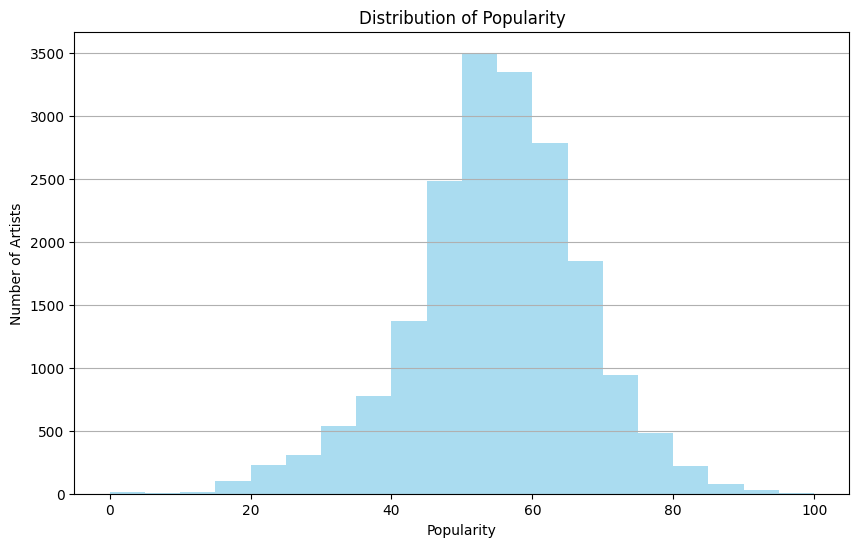

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(new_df['popularity'], bins=20, alpha=0.7, color='skyblue')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Artists')
plt.grid(axis='y')
plt.show()

In [ ]:
import statsmodels.api as sm

# Define the independent and dependent variables
X = top100['popularity']  # Independent variable
y = top100['followers']  # Dependent variable

# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression results
summary = model.summary()

# Display the summary
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              followers   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     49.03
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           3.18e-10
Time:                        06:57:19   Log-Likelihood:                -1838.0
No. Observations:                 100   AIC:                             3680.
Df Residuals:                      98   BIC:                             3685.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.462e+08   6.82e+07     -6.543      0.000   -5.82e+08   -3.11e+08
popularity  5.373e+06   7.67e+05      7.002      0.000    3.85e+06     6.9e+06
==============================================================================
Omnibus:                       20.521   Durbin-Watson:                   2.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.983
Skew:                           0.944   Prob(JB):                     3.08e-07
Kurtosis:                       4.906   Cond. No.                     2.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
testdata = top100[['popularity', 'followers']].copy()

testdata.dropna(inplace=True)
correlation = testdata.corr().iloc[0, 1]

print(f"Correlation between popularity and followers: {correlation}")

Correlation between popularity and followers: 0.5774766417590353


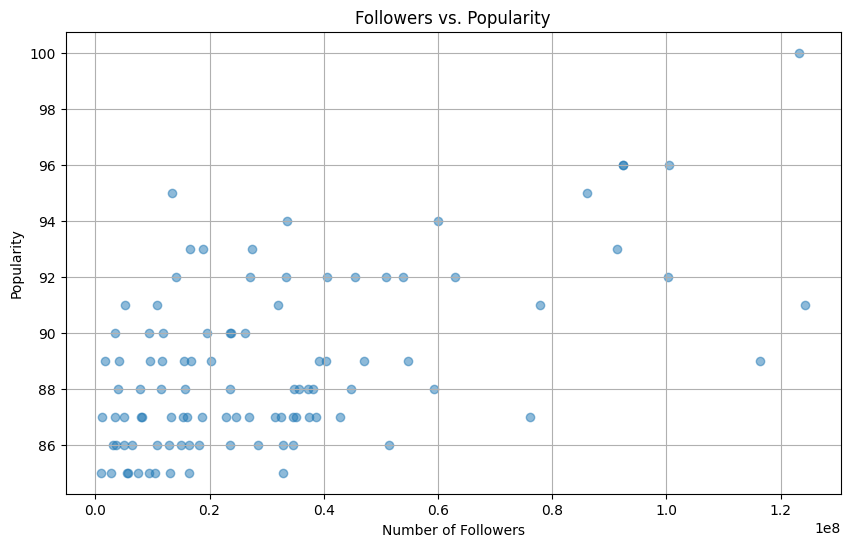

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(top100['followers'], top100['popularity'], alpha=0.5)
plt.title('Followers vs. Popularity')
plt.xlabel('Number of Followers')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

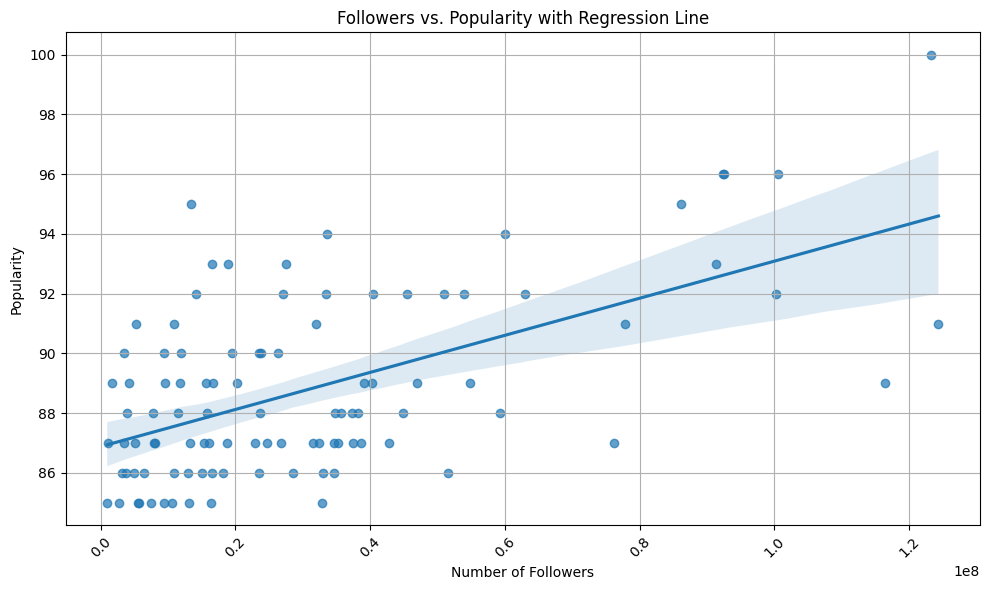

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='followers', y='popularity', data=top100, marker='o', scatter_kws={'alpha':0.7})
plt.title('Followers vs. Popularity with Regression Line')
plt.xlabel('Number of Followers')
plt.ylabel('Popularity')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [ ]:
from scipy import stats

follower_threshold = top100['followers'].median()

high_followers_popularity = top100[top100['followers'] > follower_threshold]['popularity']
low_followers_popularity = top100[top100['followers'] <= follower_threshold]['popularity']

t_stat, p_value = stats.ttest_ind(high_followers_popularity, low_followers_popularity, alternative='greater')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is evidence to suggest that artists with more followers have higher popularity.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that artists with more followers have higher popularity.")

T-statistic: 3.540743200810276
P-value: 0.0003061901643848149
Reject the null hypothesis.
There is evidence to suggest that artists with more followers have higher popularity.


In [ ]:
df['followers'] = df['followers'].apply(lambda x: x['total'] if isinstance(x, dict) and 'total' in x else 0)

In [ ]:
grouped_df = df.groupby('name')['followers'].sum().reset_index()
filtered_df = grouped_df.sort_values(by='followers', ascending=False)
filtered_df

,name,followers
3470,Eminem,639234484
1197,Billie Eilish,603213588
3144,Ed Sheeran,582161720
7173,Justin Bieber,545123691
16512,XXXTENTACION,516788041
...,...,...
11895,Quinby Locke,0
11969,Quivora,0
16702,Xenia Saxton,0
16648,Xavier Soul,0


In [ ]:
filtered_df = filtered_df.drop_duplicates(subset='name', keep='first')
filtered_df

,name,followers
3470,Eminem,639234484
1197,Billie Eilish,603213588
3144,Ed Sheeran,582161720
7173,Justin Bieber,545123691
16512,XXXTENTACION,516788041
...,...,...
11895,Quinby Locke,0
11969,Quivora,0
16702,Xenia Saxton,0
16648,Xavier Soul,0


In [ ]:
filtered_df.duplicated().sum()

0

In [ ]:
# Group by 'name' and sum followers
grouped_df = df.groupby('name')['followers'].sum().reset_index()

# Merge the grouped DataFrame with the original DataFrame
merged_df = pd.merge(grouped_df, df, on='name', how='left')

# Check the columns of merged_df
print(merged_df.columns)  # Should show followers_x and followers_y

# Drop duplicates to keep only one row for each artist
merged_df = merged_df.drop_duplicates(subset='name')

# Sort by the correct followers column (change as necessary)
followers_df = merged_df.sort_values(by='followers_x', ascending=False)
followers_df.drop(['followers_y'], axis=1, inplace=True)
followers_df



Index(['name', 'followers_x', 'followers_y', 'genres', 'id', 'popularity'], dtype='object')


,name,followers_x,genres,id,popularity
5192,Eminem,639234484,"[detroit hip hop, hip hop, rap]",7dGJo4pcD2V6oG8kP0tJRR,93
1835,Billie Eilish,603213588,"[art pop, pop]",6qqNVTkY8uBg9cP3Jd7DAH,96
4766,Ed Sheeran,582161720,"[pop, singer-songwriter pop, uk pop]",6eUKZXaKkcviH0Ku9w2n3V,89
10126,Justin Bieber,545123691,"[canadian pop, pop]",1uNFoZAHBGtllmzznpCI3s,91
23046,XXXTENTACION,516788041,"[emo rap, miami hip hop, rap]",15UsOTVnJzReFVN1VCnxy4,89
...,...,...,...,...,...
16599,Quinby Locke,0,[],49Oea6q0rSHKYy0QQp9SP3,19
16679,Quivora,0,[],4U0V9pyHvEnAPOrj1jHCoC,27
23256,Xenia Saxton,0,[],23kFPRQyumnvMZrdzJ3PNc,30
23199,Xavier Soul,0,[],3kRIwgfxfUV9RmwiIxfaIP,20


In [ ]:
followers_df['name'].duplicated().sum()


0

In [ ]:
merged_df = pd.merge(df, grouped_df, on='name')

popularity_df = followers_df.sort_values(by='popularity', ascending=False)
popularity_df.head(1000)



,name,followers_x,genres,id,popularity
18951,Taylor Swift,493198516,[pop],06HL4z0CvFAxyc27GXpf02,100
1835,Billie Eilish,603213588,"[art pop, pop]",6qqNVTkY8uBg9cP3Jd7DAH,96
4452,Drake,184917194,"[canadian hip hop, canadian pop, hip hop, pop ...",3TVXtAsR1Inumwj472S9r4,96
20099,The Weeknd,369659144,"[canadian contemporary r&b, canadian pop, pop]",1Xyo4u8uXC1ZmMpatF05PJ,96
1464,Bad Bunny,172320548,"[reggaeton, trap latino, urbano latino]",4q3ewBCX7sLwd24euuV69X,95
...,...,...,...,...,...
6940,Gloria Trevi,5575690,"[latin arena pop, latin pop, mexican pop]",1Db5GsIoVWYktPoD2nnPZZ,73
17650,S. Janaki,9284446,"[classic kollywood, filmi]",5Xpg6PBSUOoho2lI9qLjiu,73
13086,Michael Marcagi,191642,[],4j96cMcT8GRi11qbvo1cLQ,73
13825,Ndotz,83931,[chill drill],5HK6QtizXJzCmoYTkvFRik,73


Now lets see if the popularity and followers have any connection to each other in the top 1000?

In [ ]:
data = followers_df.head(5000)
testdata = data[['popularity', 'followers_x']].copy()

# Remove any rows with missing values to avoid skewing the correlation
testdata.dropna(inplace=True)
correlation = testdata.corr().iloc[0, 1]  # Get the correlation coefficient between popularity and followers

# Display the correlation coefficient
print(f"Correlation between popularity and followers: {correlation}")

Correlation between popularity and followers: 0.43281624990759443


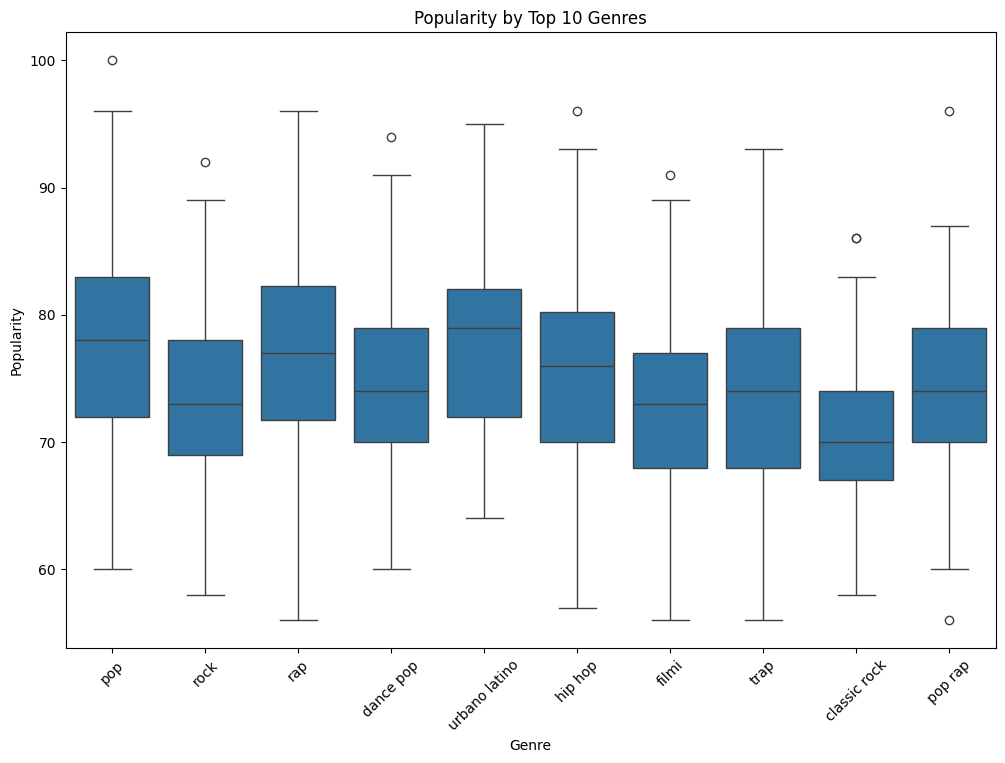

In [ ]:
# Get the top 10 genres based on value counts
top_genres = data['genres'].explode().value_counts().head(10).index

# Filter data for rows where at least one genre is in the top genres
filtered_data = data[data['genres'].apply(lambda x: any(genre in x for genre in top_genres))]

# Explode the 'genres' column so each genre is on a separate row
exploded_data = filtered_data.explode('genres')

# Filter the exploded data to include only the top genres
exploded_data = exploded_data[exploded_data['genres'].isin(top_genres)]

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='genres', y='popularity', data=exploded_data, order=top_genres)
plt.xticks(rotation=45)
plt.title('Popularity by Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.show()



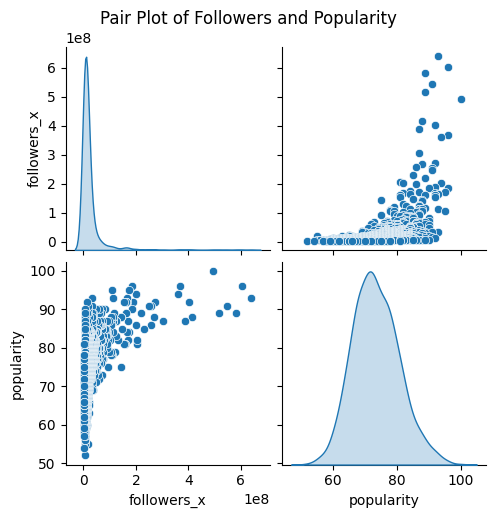

In [ ]:
sns.pairplot(data[['followers_x', 'popularity']], diag_kind='kde')
plt.suptitle('Pair Plot of Followers and Popularity', y=1.02)
plt.show()



In [ ]:
import statsmodels.api as sm

# Define the independent and dependent variables
X = data['popularity']  # Independent variable
y = data['followers_x']  # Dependent variable

# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression results
summary = model.summary()

# Display the summary
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            followers_x   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     1152.
Date:                Sun, 13 Oct 2024   Prob (F-statistic):          1.96e-227
Time:                        06:25:20   Log-Likelihood:                -92690.
No. Observations:                5000   AIC:                         1.854e+05
Df Residuals:                    4998   BIC:                         1.854e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.712e+07   3.12e+06    -31.093      0.000   -1.03e+08    -9.1e+07
popularity  1.593e+06   4.69e+04     33.943      0.000     1.5e+06    1.68e+06
==============================================================================
Omnibus:                     8502.801   Durbin-Watson:                   0.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7739784.033
Skew:                          11.658   Prob(JB):                         0.00
Kurtosis:                     194.330   Cond. No.                         540.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

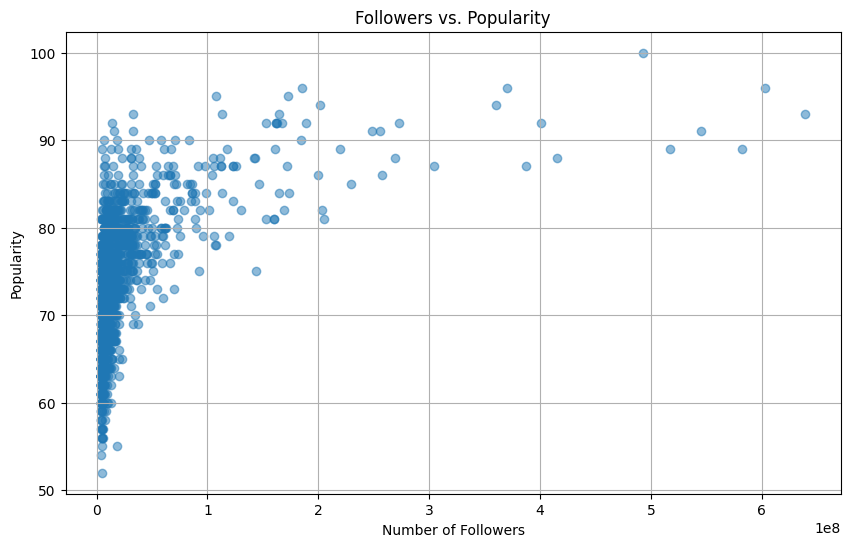

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['followers_x'], data['popularity'], alpha=0.5)
plt.title('Followers vs. Popularity')
plt.xlabel('Number of Followers')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()



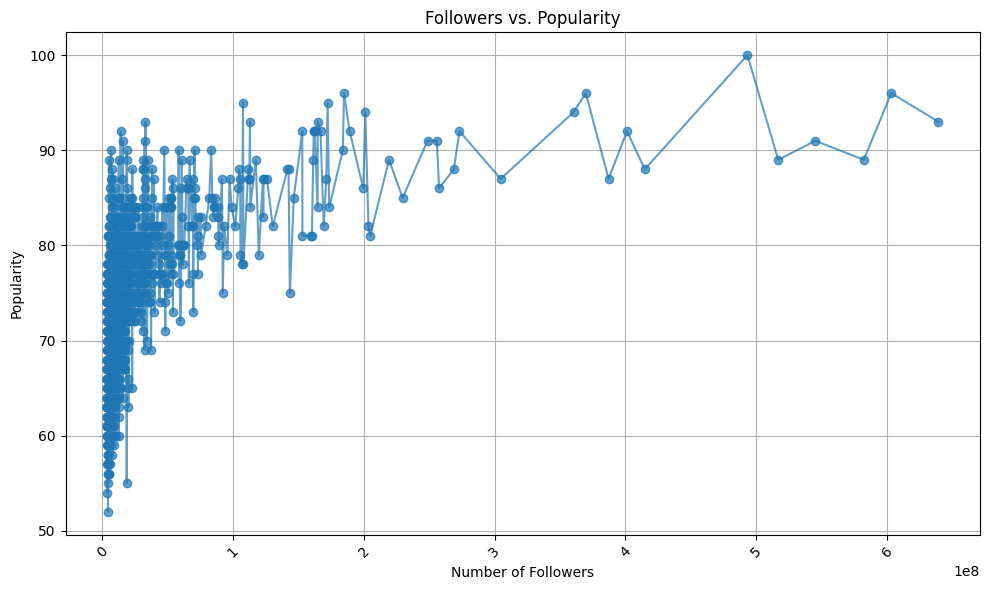

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['followers_x'], data['popularity'], marker='o', linestyle='-', alpha=0.7)
plt.title('Followers vs. Popularity')
plt.xlabel('Number of Followers')
plt.ylabel('Popularity')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

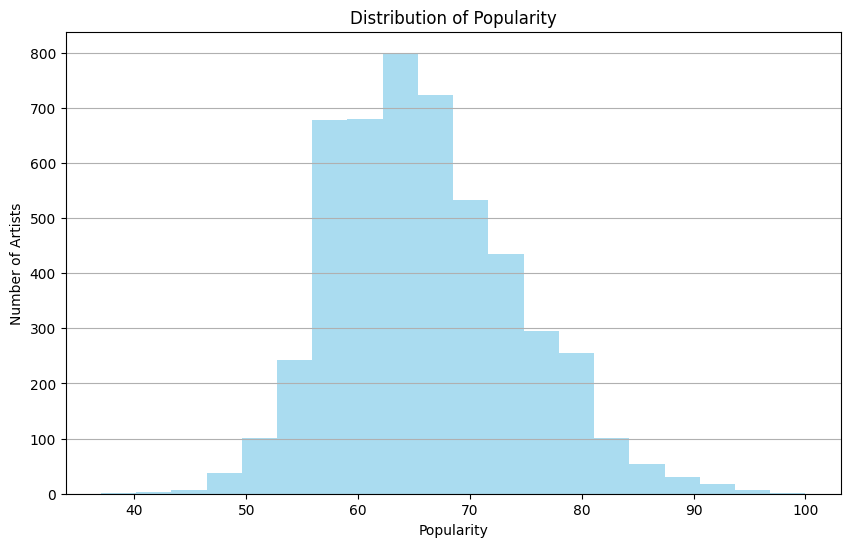

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['popularity'], bins=20, alpha=0.7, color='skyblue')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Artists')
plt.grid(axis='y')
plt.show()


In [ ]:
from scipy import stats

follower_threshold = data['followers_x'].median()

# Create two groups based on followers
high_followers_popularity = data[data['followers_x'] > follower_threshold]['popularity']
low_followers_popularity = data[data['followers_x'] <= follower_threshold]['popularity']

# Perform a one-tailed T-test (testing if high_followers group has greater popularity)
t_stat, p_value = stats.ttest_ind(high_followers_popularity, low_followers_popularity, alternative='greater')

# Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is evidence to suggest that artists with more followers have higher popularity.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that artists with more followers have higher popularity.")

T-statistic: 44.65591919275453
P-value: 0.0
Reject the null hypothesis.
There is evidence to suggest that artists with more followers have higher popularity.


In [ ]:
from scipy.stats import mannwhitneyu

# Perform a one-tailed Mann-Whitney U test
u_stat, p_value = mannwhitneyu(high_followers_popularity, low_followers_popularity, alternative='greater')

print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is evidence to suggest that artists with more followers have higher popularity.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that artists with more followers have higher popularity.")


U-statistic: 200634.5
P-value: 4.909888603193014e-62
Reject the null hypothesis.
There is evidence to suggest that artists with more followers have higher popularity.
